<a href="https://colab.research.google.com/github/freedomszeto/WeChatCompetition_2021/blob/main/WeChat_Data_competition_Freedom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Data**

In [37]:
data_path='/content/drive/MyDrive/WeChat_Data_Competition'

In [38]:
from os import listdir
filenames =listdir(data_path)

import numpy as np
import pandas as pd

for i in np.arange(len(filenames)):
    if filenames[i][-3:]=='csv':
        vars()['df_'+filenames[i][:-4]] = pd.read_csv(data_path+'/'+filenames[i])
        print('df_'+filenames[i][:-4]+':'+str(len(vars()['df_'+filenames[i][:-4]])))
    else:
        pass

df_test_a:421985
df_feed_embeddings:106444
df_submit_demo_初赛a:421985
df_user_action:7317882
df_feed_info:106444


# **Data screening**

In [39]:
#Training Data (X) & (Y)
df_user_action.sample(10)

,userid,feedid,date_,device,read_comment,comment,like,play,stay,click_avatar,forward,follow,favorite
3654875,125524,21609,6,2,0,0,0,28065,28866,0,0,0,0
1676672,56659,6365,8,2,0,0,0,7690,7955,0,0,0,0
432135,14358,35631,4,1,0,0,0,9250,9672,0,0,0,0
976186,33252,112266,6,2,0,0,0,22490,22687,0,0,0,0
881586,29680,59920,8,1,0,0,0,0,3856,0,0,0,0
4367305,148869,47248,5,2,0,0,0,23976,24956,0,0,0,0
1887557,63224,50351,13,2,0,0,0,15904,16119,0,0,0,0
2366697,79723,18643,11,1,0,0,0,36500,36881,0,0,0,0
3852227,132119,17384,9,2,0,0,0,2667,2979,0,0,0,0
7189092,245759,32618,13,2,0,0,0,43221,44211,0,0,0,0


In [40]:
#Test data (X) -> to predict Y
df_test_a.head(10)

,userid,feedid,device
0,14298,67227,1
1,68356,91864,2
2,49925,104657,2
3,60529,23738,2
4,131482,69038,1
5,52981,33636,1
6,55058,22853,2
7,78168,100222,1
8,135784,78982,2
9,72975,81367,2


In [41]:
#feed_id (X)????
df_feed_embeddings.head(10)

,feedid,feed_embedding
0,46022,-0.02032269 0.06095614 0.11057708 0.03385210 0...
1,73903,-0.07594238 0.01796364 -0.00135112 -0.00333468...
2,88646,-0.05067272 -0.08208735 -0.01929738 -0.0150182...
3,24381,-0.06976026 0.00218324 0.04416835 0.06146711 -...
4,41542,-0.04981736 -0.03523079 0.03022859 0.06672543 ...
5,15622,-0.10077595 -0.01764622 0.03897166 -0.04593844...
6,5662,-0.07481042 -0.07795808 0.00200225 -0.02691050...
7,4282,-0.00903127 0.04316609 0.06915708 0.00960549 0...
8,26337,-0.04625623 -0.01046129 0.08407867 -0.00102488...
9,64025,-0.03590044 0.01959696 0.01913530 0.03326439 0...


In [42]:
#feed info 
df_feed_info.head(3)

,feedid,authorid,videoplayseconds,description,ocr,asr,bgm_song_id,bgm_singer_id,manual_keyword_list,machine_keyword_list,manual_tag_list,machine_tag_list,description_char,ocr_char,asr_char
0,43549,6165,38,104741 122649 8109 117252 65632 23463 118668 4...,139499 59421 82007 142955 27736 83577 52394 11...,142955 27736 83577 103956 32010 34170 89740 90...,19356.0,11703.0,15506;7715;17582,26334;219;25209;7715;18541,81;269;159;6,269 0.8525666;81 0.8525666;8 1.1e-07;306 0.0;2...,26439 5247 6426 3827 1882 26018 20744 22204 30...,25926 8491 13394 2203 26439 6243 33054 16435 1...,2203 26439 6243 33054 16435 16307 17070 24908 ...
1,77432,9386,60,35753 27736 146603 73055 11794 101761 11794 81...,35753 146603 73055 11794 101761 67496 16933 52...,146739 14368 79290 79213 47366 8109 33194 1198...,NaN,NaN,8199;18322;4243,24078;19924,194;267;159;6,267 0.99293476;194 0.99293476,31010 32495 6243 13923 15360 30483 2709 26084 ...,31010 32495 13923 15360 30483 2709 26084 15160...,7259 20851 5061 26207 17573 17531 15117 20072 ...
2,12921,2996,15,114413 107973 117252 27736 41035 32715 125374 ...,NaN,NaN,10288.0,11354.0,NaN,11696;6926,202;23;160;6,23 0.64771646;202 0.64771646,27077 10050 27464 20072 26018 6243 21492 14750...,NaN,NaN


In [43]:
df_submit_demo_初赛a.head(10)

,userid,feedid,read_comment,like,click_avatar,forward
0,14298,67227,0.880075,0.483832,0.722144,0.563880
1,68356,91864,0.769031,0.929535,0.186520,0.257904
2,49925,104657,0.932616,0.405896,0.142349,0.284657
3,60529,23738,0.143770,0.550933,0.316308,0.159592
4,131482,69038,0.139427,0.051200,0.295990,0.092229
5,52981,33636,0.073550,0.384265,0.085490,0.348019
6,55058,22853,0.188886,0.877843,0.251247,0.670633
7,78168,100222,0.470670,0.266480,0.934919,0.468340
8,135784,78982,0.788318,0.446627,0.961844,0.938570
9,72975,81367,0.958540,0.357957,0.310659,0.145679


# **Freedom's**



## **Data pre-processing**

### **- Feed embeding Data for (X)**

In [44]:
#Data (X) feed embedding
_list_embeddings=[]
_list_embeddings=[x.strip().split(' ') for x in df_feed_embeddings['feed_embedding'].tolist()]
#Convert string to float
_list_embeddings_num=[list(np.float_(lst)) for lst in  _list_embeddings]

In [45]:
#Data Columns (X) feed embedding
_list_Feed_columns=['X_' + str(sub) for sub in np.arange(len(_list_embeddings_num[0]))]

In [46]:
#Create feed embedding data
df_feed_X=pd.DataFrame(data=_list_embeddings_num,columns=_list_Feed_columns)
#Merge on FeedID
df_feed_embeddings_X=pd.merge(df_feed_embeddings['feedid'],df_feed_X, left_index=True, right_index=True)

In [47]:
# To release memory
del _list_embeddings_num 
del _list_embeddings

###----- Check Feed embeding Data

In [48]:
#Check NaN data
df_feed_embeddings_X.isnull().values.any()

False

In [49]:
df_feed_embeddings_X.head(3)

,feedid,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,...,X_472,X_473,X_474,X_475,X_476,X_477,X_478,X_479,X_480,X_481,X_482,X_483,X_484,X_485,X_486,X_487,X_488,X_489,X_490,X_491,X_492,X_493,X_494,X_495,X_496,X_497,X_498,X_499,X_500,X_501,X_502,X_503,X_504,X_505,X_506,X_507,X_508,X_509,X_510,X_511
0,46022,-0.020323,0.060956,0.110577,0.033852,0.028125,-0.085190,0.055592,-0.001098,-0.006469,-0.040490,0.050003,0.030590,0.023775,0.016129,0.006675,-0.019058,0.028737,-0.038177,0.063162,-0.022369,0.041543,-0.019273,-0.065638,0.081566,-0.045814,-0.059316,0.013377,0.070154,-0.015702,-0.018321,-0.014080,-0.077180,-0.008886,-0.012408,0.065398,0.010434,0.045773,0.024244,-0.007295,...,-0.027442,0.008716,0.002703,0.019876,-0.090183,-0.032537,-0.004720,0.033999,-0.046672,-0.068530,0.058420,0.013628,0.015241,0.057415,-0.015635,-0.051328,-0.007046,0.030525,0.076565,0.034216,0.006677,0.001987,0.175590,-0.084504,-0.068579,-0.084344,-0.063360,-0.044166,0.030180,0.083635,0.073053,-0.005482,-0.007490,0.031201,-0.071249,-0.031798,0.040727,-0.011228,0.001824,0.018544
1,73903,-0.075942,0.017964,-0.001351,-0.003335,-0.039069,-0.012011,0.014896,-0.020899,0.100037,-0.073923,0.032253,0.024733,0.006362,0.021023,0.030891,-0.031349,-0.064041,0.033738,-0.005180,-0.012711,0.019486,0.050983,0.005509,-0.024289,0.057363,-0.023029,0.049625,-0.013093,0.094092,-0.020512,0.045075,0.033395,-0.002570,-0.024000,0.059284,0.030325,0.043798,0.011206,-0.055404,...,-0.059543,-0.036542,-0.004397,-0.030557,-0.033170,-0.039639,0.007106,-0.018315,-0.013346,-0.012272,0.005906,0.006817,-0.028856,0.001431,-0.014855,-0.018370,0.030396,0.013597,0.002659,0.074067,0.046170,0.072228,0.140893,0.036249,0.015693,-0.115075,-0.024943,-0.000283,-0.016740,0.100125,0.011751,0.004190,0.064341,0.094825,-0.078081,0.003889,-0.014045,-0.087243,-0.044992,0.014717
2,88646,-0.050673,-0.082087,-0.019297,-0.015018,-0.000390,-0.051599,0.043321,-0.069046,0.032217,-0.015544,-0.043855,-0.044078,-0.035882,0.022807,0.048777,-0.050294,-0.055595,-0.065153,0.016518,-0.036729,0.022894,0.056650,0.002671,0.012963,-0.020440,-0.015135,-0.005572,0.097868,0.025273,-0.002121,0.027417,0.003301,0.032801,0.024886,0.069834,0.024144,-0.006991,-0.057108,-0.082292,...,-0.018050,-0.000946,-0.000946,-0.010450,-0.031935,-0.085231,0.059711,-0.004069,0.026912,-0.048627,0.006784,-0.018839,-0.007815,-0.031992,-0.007566,-0.031945,0.059819,0.007014,-0.002640,0.035705,0.055600,0.069681,0.125612,0.048009,-0.000183,-0.087922,-0.008881,-0.047463,-0.036239,0.077850,0.023434,-0.079689,0.058327,0.034262,-0.009084,-0.025580,-0.008750,-0.003565,0.013552,0.021545


In [50]:
df_feed_embeddings_X.tail(3)

,feedid,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,...,X_472,X_473,X_474,X_475,X_476,X_477,X_478,X_479,X_480,X_481,X_482,X_483,X_484,X_485,X_486,X_487,X_488,X_489,X_490,X_491,X_492,X_493,X_494,X_495,X_496,X_497,X_498,X_499,X_500,X_501,X_502,X_503,X_504,X_505,X_506,X_507,X_508,X_509,X_510,X_511
106441,66410,-0.006194,0.004365,0.026771,-0.020137,-0.073253,-0.098104,-0.015283,-0.037157,-0.074449,-0.023142,0.002907,0.059261,-0.074697,0.017964,0.001024,-0.044236,-0.062544,0.019082,-0.037372,0.028796,0.004268,0.026641,-0.050764,0.045411,0.013751,0.086901,0.078046,0.035665,0.067252,-0.034432,0.050651,0.000294,0.001212,0.025169,0.045674,-0.028069,0.000176,-0.020752,0.000346,...,-0.010198,-0.012318,0.038839,-0.007358,-0.007505,0.077867,0.041421,-0.010238,-0.002388,-0.029156,0.016238,0.043866,-0.026456,0.044375,0.055156,-0.032129,-0.019800,-0.012852,0.041681,-0.007086,0.056590,-0.053442,0.116056,-0.040261,-0.046709,-0.087885,0.048384,-0.026192,-0.027640,-0.005039,0.031822,-0.001642,0.005780,-0.056018,-0.013198,-0.002852,0.041717,-0.029440,0.040435,0.038833
106442,7919,-0.056616,-0.132325,-0.034051,0.026896,-0.037564,-0.038448,0.042680,0.041747,-0.020963,-0.068147,-0.097938,-0.055873,0.067541,0.019557,0.031695,-0.034589,-0.014413,-0.029950,0.009496,-0.018405,0.066226,-0.017776,0.037486,-0.038148,0.003982,-0.064239,0.015321,0.020589,0.033773,0.002812,0.024638,0.002553,-0.021630,-0.033388,0.013497,0.001530,0.003040,-0.075090,-0.035682,...,-0.068546,0.041760,0.035815,-0.039786,-0.085565,-0.088827,0.073943,-0.036991,0.031913,-0.066685,0.044627,-0.002128,0.021552,0.044172,-0.060671,-0.034037,-0.011568,-0.025932,0.061114,0.037626,0.055031,-0.086923,0.110555,-0.007252,-0.051375,-0.039976,0.023897,0.054094,0.014834,0.083576,-0.019717,-0.008263,0.041563,0.049817,-0.016654,0.017793,0.042140,-0.090922,-0.029644,0.043790
106443,30814,-0.031621,0.012202,-0.034196,0.041800,0.032551,0.008273,0.025489,0.020592,0.063458,-0.048692,-0.042560,-0.075689,0.042015,0.010242,0.006343,-0.024075,-0.000445,0.057938,-0.054409,-0.032302,0.014076,0.054840,-0.013665,-0.014645,-0.023489,-0.003142,-0.049176,0.051081,0.073438,0.026865,0.026982,0.006739,-0.011789,0.007141,0.020885,-0.005423,-0.113116,0.015382,-0.059076,...,-0.061246,-0.019042,0.015585,0.016471,0.029277,-0.097061,-0.007497,0.032778,-0.037261,-0.010602,-0.003544,0.051102,-0.011009,-0.043721,0.060356,-0.019837,-0.031269,0.013458,-0.034135,0.000137,-0.032172,0.039296,0.084269,0.044101,0.029310,-0.166182,0.026453,0.010244,-0.020662,-0.050546,0.003034,-0.074777,0.055233,0.012304,-0.117919,0.033329,-0.011915,-0.060238,0.002613,0.036961


### **- Preparing Training Data (X) + (Y)**

In [51]:
# test data columns
df_test_a.columns

Index(['userid', 'feedid', 'device'], dtype='object')

In [52]:
# Submission data columns
df_submit_demo_初赛a.columns

Index(['userid', 'feedid', 'read_comment', 'like', 'click_avatar', 'forward'], dtype='object')

In [53]:
# Y columns
_list_Ycolumns=df_test_a.columns.append(df_submit_demo_初赛a.columns) ###Combine Y columns
_list_Ycolumns = list(dict.fromkeys(_list_Ycolumns)) ### Remove duplicate items

In [54]:
####Training Data
df_Training_Y=df_user_action[_list_Ycolumns] ###Y data

In [55]:
# df_Training=pd.merge(df_Training_Y,df_feed_embeddings_X,on='feedid',how='left') # Merge with X

In [56]:
df_Training_Y.head(2)

,userid,feedid,device,read_comment,like,click_avatar,forward
0,8,71474,1,0,1,0,0
1,8,73916,1,0,0,0,0


In [57]:
df_feed_embeddings_X.head(2)

,feedid,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,...,X_472,X_473,X_474,X_475,X_476,X_477,X_478,X_479,X_480,X_481,X_482,X_483,X_484,X_485,X_486,X_487,X_488,X_489,X_490,X_491,X_492,X_493,X_494,X_495,X_496,X_497,X_498,X_499,X_500,X_501,X_502,X_503,X_504,X_505,X_506,X_507,X_508,X_509,X_510,X_511
0,46022,-0.020323,0.060956,0.110577,0.033852,0.028125,-0.085190,0.055592,-0.001098,-0.006469,-0.040490,0.050003,0.030590,0.023775,0.016129,0.006675,-0.019058,0.028737,-0.038177,0.063162,-0.022369,0.041543,-0.019273,-0.065638,0.081566,-0.045814,-0.059316,0.013377,0.070154,-0.015702,-0.018321,-0.014080,-0.077180,-0.008886,-0.012408,0.065398,0.010434,0.045773,0.024244,-0.007295,...,-0.027442,0.008716,0.002703,0.019876,-0.090183,-0.032537,-0.004720,0.033999,-0.046672,-0.068530,0.058420,0.013628,0.015241,0.057415,-0.015635,-0.051328,-0.007046,0.030525,0.076565,0.034216,0.006677,0.001987,0.175590,-0.084504,-0.068579,-0.084344,-0.063360,-0.044166,0.03018,0.083635,0.073053,-0.005482,-0.007490,0.031201,-0.071249,-0.031798,0.040727,-0.011228,0.001824,0.018544
1,73903,-0.075942,0.017964,-0.001351,-0.003335,-0.039069,-0.012011,0.014896,-0.020899,0.100037,-0.073923,0.032253,0.024733,0.006362,0.021023,0.030891,-0.031349,-0.064041,0.033738,-0.005180,-0.012711,0.019486,0.050983,0.005509,-0.024289,0.057363,-0.023029,0.049625,-0.013093,0.094092,-0.020512,0.045075,0.033395,-0.002570,-0.024000,0.059284,0.030325,0.043798,0.011206,-0.055404,...,-0.059543,-0.036542,-0.004397,-0.030557,-0.033170,-0.039639,0.007106,-0.018315,-0.013346,-0.012272,0.005906,0.006817,-0.028856,0.001431,-0.014855,-0.018370,0.030396,0.013597,0.002659,0.074067,0.046170,0.072228,0.140893,0.036249,0.015693,-0.115075,-0.024943,-0.000283,-0.01674,0.100125,0.011751,0.004190,0.064341,0.094825,-0.078081,0.003889,-0.014045,-0.087243,-0.044992,0.014717


In [58]:
df_Training_Y.memory_usage(deep=True) * 1e-6

Index            0.000128
userid          58.543056
feedid          58.543056
device          58.543056
read_comment    58.543056
like            58.543056
click_avatar    58.543056
forward         58.543056
dtype: float64

In [59]:
df_feed_embeddings_X.memory_usage(deep=True) * 1e-6

Index     0.000128
feedid    0.851552
X_0       0.851552
X_1       0.851552
X_2       0.851552
            ...   
X_507     0.851552
X_508     0.851552
X_509     0.851552
X_510     0.851552
X_511     0.851552
Length: 514, dtype: float64

### **- EDA**

In [25]:
###-----------------Summary-----------------###

In [26]:
df_Training_Y.sample(3)
# len(df_Training_Y)

,userid,feedid,device,read_comment,like,click_avatar,forward
1751420,58718,25879,1,0,0,0,0
2509871,85334,92568,2,1,0,0,0
6614039,226614,38797,2,0,0,0,0


In [27]:
print(df_Training_Y['read_comment'].value_counts())
print((df_Training_Y['read_comment'].value_counts()/len(df_Training_Y))*100)
print('-'*50)
print(df_Training_Y['like'].value_counts())
print((df_Training_Y['like'].value_counts()/len(df_Training_Y))*100)
print('-'*50)
print(df_Training_Y['click_avatar'].value_counts())
print((df_Training_Y['click_avatar'].value_counts()/len(df_Training_Y))*100)
print('-'*50)
print(df_Training_Y['forward'].value_counts())
print((df_Training_Y['forward'].value_counts()/len(df_Training_Y))*100)

0    7061640
1     256242
Name: read_comment, dtype: int64
0    96.498413
1     3.501587
Name: read_comment, dtype: float64
--------------------------------------------------
0    7129045
1     188837
Name: like, dtype: int64
0    97.419513
1     2.580487
Name: like, dtype: float64
--------------------------------------------------
0    7262754
1      55128
Name: click_avatar, dtype: int64
0    99.246667
1     0.753333
Name: click_avatar, dtype: float64
--------------------------------------------------
0    7289919
1      27963
Name: forward, dtype: int64
0    99.617881
1     0.382119
Name: forward, dtype: float64


In [28]:
# read_comment
no_user_read_comment= df_Training_Y.groupby('feedid')['read_comment'].agg('count')
no_feed_read_comment= df_Training_Y.groupby('userid')['read_comment'].agg('count')

# like
no_user_like= df_Training_Y.groupby('feedid')['like'].agg('count')
no_feed_like= df_Training_Y.groupby('userid')['like'].agg('count')

# click_avatar
no_user_click_avatar= df_Training_Y.groupby('feedid')['click_avatar'].agg('count')
no_feed_click_avatar= df_Training_Y.groupby('userid')['click_avatar'].agg('count')

# forward
no_user_forward= df_Training_Y.groupby('feedid')['forward'].agg('count')
no_feed_forward= df_Training_Y.groupby('userid')['forward'].agg('count')

In [29]:
print('-'*20+' read_comment no. of users by feed '+'-'*20)
print(no_user_read_comment.describe())
print('-'*20+' read_comment no. of feeds by user '+'-'*20)
print(no_feed_read_comment.describe())

print('-'*20+' like no. of users by feed '+'-'*20)
print(no_user_like.describe())
print('-'*20+' like no. of feeds by user '+'-'*20)
print(no_feed_like.describe())

print('-'*20+' click_avatar no. of users by feed '+'-'*20)
print(no_user_click_avatar.describe())
print('-'*20+' click_avatar no. of feeds by user '+'-'*20)
print(no_feed_click_avatar.describe())

print('-'*20+' forward no. of users by feed '+'-'*20)
print(no_user_forward.describe())
print('-'*20+' forward no. of feeds by user '+'-'*20)
print(no_feed_forward.describe())

-------------------- read_comment no. of users by feed --------------------
count    96564.000000
mean        75.782714
std        193.723214
min          1.000000
25%          5.000000
50%         16.000000
75%         59.000000
max       6841.000000
Name: read_comment, dtype: float64
-------------------- read_comment no. of feeds by user --------------------
count    20000.000000
mean       365.894100
std        242.206111
min          8.000000
25%        157.750000
50%        314.000000
75%        545.000000
max        980.000000
Name: read_comment, dtype: float64
-------------------- like no. of users by feed --------------------
count    96564.000000
mean        75.782714
std        193.723214
min          1.000000
25%          5.000000
50%         16.000000
75%         59.000000
max       6841.000000
Name: like, dtype: float64
-------------------- like no. of feeds by user --------------------
count    20000.000000
mean       365.894100
std        242.206111
min          8.000000

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

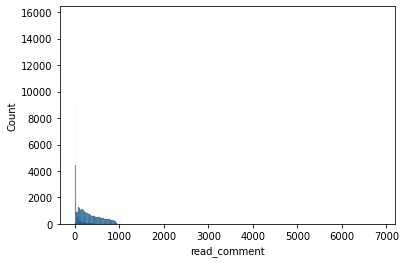

In [31]:
# print('-'*20+' read_comment no. of users by feed '+'-'*20)
sns.histplot(no_user_read_comment)
# print('-'*20+' read_comment no. of feeds by user '+'-'*20)
sns.histplot(no_feed_read_comment)

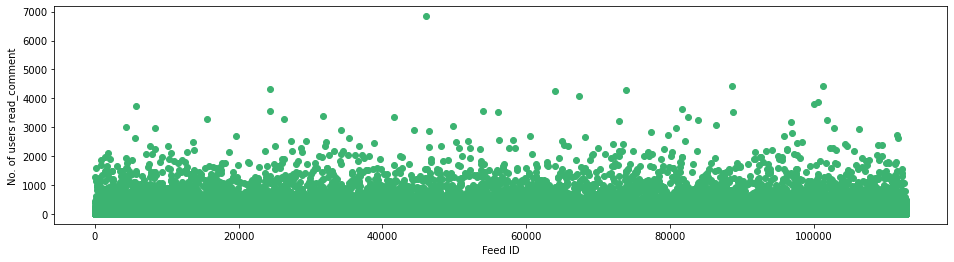

In [32]:
#Let’s visualize the number of users who read_comment.
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_read_comment.index,no_user_read_comment,color='mediumseagreen')
# plt.axhline(y=800,color='r')
plt.xlabel('Feed ID')
plt.ylabel('No. of users read_comment')
plt.show()

In [33]:
# _list_check=[]
# _list_error=[]
# _loop=1
# for i in df_test_a['userid'].unique().tolist():
#   if i in df_Training_Y['userid'].unique().tolist():
#     _list_check.append(i)
#   else:
#     _list_error.append(i)
#   print(_loop)
#   _loop=_loop+1

In [34]:
len(df_test_a['userid'].unique().tolist())

9757

In [35]:
len(_list_check)

NameError: ignored

In [ ]:
len(_list_error)

## **Build Model**

### **- Content-based approch**

In [60]:
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

import seaborn as sns

In [61]:
# DATA PROCESSING

X = df_feed_embeddings_X.iloc[:,1:].values
X = np.nan_to_num(X)

# sc = StandardScaler()
# cluster_data = sc.fit_transform(X)
# print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])

In [62]:
X.shape[0]

106444

50
100
150
200
250
300
350
400
450


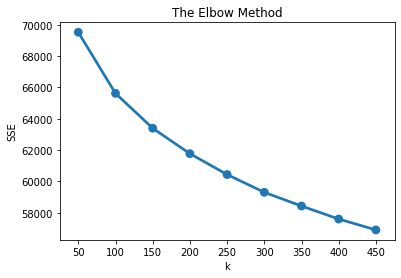

In [ ]:
# sse = {}
# for k in np.arange(50,500,50):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(X)
#     sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
#     print(k)
# plt.title('The Elbow Method')
# plt.xlabel('k')
# plt.ylabel('SSE')
# sns.pointplot(x=list(sse.keys()), y=list(sse.values())) 
# plt.show()

In [63]:
###K-means clustering
clusters = 200
model = KMeans(n_clusters=clusters)
model.fit(X)
model.labels_.shape

(106444,)

In [66]:
###Clustering result
df_feed_embeddings_X["Cluster"] = model.labels_
df_feed_embeddings_X.iloc[:,1:].groupby('Cluster').mean().round(2)

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,...,X_472,X_473,X_474,X_475,X_476,X_477,X_478,X_479,X_480,X_481,X_482,X_483,X_484,X_485,X_486,X_487,X_488,X_489,X_490,X_491,X_492,X_493,X_494,X_495,X_496,X_497,X_498,X_499,X_500,X_501,X_502,X_503,X_504,X_505,X_506,X_507,X_508,X_509,X_510,X_511
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.02,0.00,0.01,0.01,-0.01,-0.04,0.01,-0.02,0.01,-0.01,-0.01,0.04,0.00,0.02,0.01,-0.01,-0.02,0.01,-0.01,-0.02,-0.01,0.06,-0.03,-0.02,0.02,0.03,-0.00,0.03,0.04,-0.02,0.03,-0.00,-0.02,-0.01,-0.02,-0.01,-0.01,-0.03,-0.03,-0.02,...,-0.02,-0.00,0.00,-0.02,-0.03,0.00,0.02,-0.02,0.02,-0.03,0.04,0.00,-0.00,-0.01,0.02,-0.01,-0.01,0.00,0.02,0.01,-0.01,0.04,0.08,-0.01,0.00,-0.07,-0.01,0.02,-0.00,0.04,0.01,-0.01,0.00,0.02,-0.04,0.01,0.01,-0.05,-0.02,0.01
1,-0.01,-0.02,0.00,0.01,-0.01,-0.02,0.01,-0.02,-0.00,-0.02,-0.01,-0.00,0.02,0.03,0.03,-0.02,-0.02,0.02,-0.01,-0.02,-0.00,0.07,0.00,0.00,0.02,0.03,0.02,0.08,0.05,-0.04,0.03,-0.02,0.01,-0.03,-0.03,0.00,-0.03,-0.01,-0.02,-0.02,...,0.01,-0.02,-0.01,0.01,-0.05,-0.04,0.04,-0.06,0.01,-0.08,0.03,0.02,0.00,-0.01,0.04,-0.00,0.02,0.01,0.01,0.03,-0.00,0.02,0.09,0.00,0.03,-0.03,-0.01,-0.00,0.00,0.07,-0.01,0.01,0.04,0.03,-0.12,0.03,0.03,-0.06,-0.09,0.02
2,-0.01,0.00,0.07,-0.01,0.00,-0.01,-0.01,-0.04,0.02,-0.02,0.01,0.02,-0.01,0.03,0.00,-0.00,-0.04,-0.01,-0.01,0.01,0.01,-0.00,0.01,-0.02,-0.01,0.02,-0.01,0.00,0.06,-0.01,0.04,0.00,-0.03,0.03,0.01,-0.00,-0.02,-0.01,-0.03,-0.02,...,-0.06,-0.03,0.00,-0.02,-0.05,-0.03,0.02,-0.04,0.04,-0.05,0.05,0.01,0.02,-0.02,0.02,0.00,-0.00,-0.00,0.01,0.03,0.01,-0.02,0.09,-0.01,-0.00,-0.04,-0.02,-0.02,-0.04,0.10,-0.01,-0.01,0.02,0.03,-0.10,0.01,-0.00,-0.02,-0.03,0.02
3,0.01,-0.02,0.09,0.00,0.02,0.00,0.03,-0.02,0.04,-0.01,0.02,0.02,-0.01,0.02,0.01,-0.03,-0.03,0.04,0.01,0.05,-0.00,0.09,0.01,0.03,-0.02,0.01,-0.04,0.03,0.08,0.01,0.03,0.01,-0.01,0.04,-0.02,-0.02,-0.04,-0.02,-0.05,-0.06,...,-0.01,0.03,0.01,-0.03,-0.05,-0.03,0.05,-0.06,0.04,-0.03,0.02,-0.01,-0.01,-0.01,0.04,-0.01,0.02,0.03,0.01,0.01,-0.01,0.04,0.05,-0.01,0.00,-0.02,-0.08,-0.01,-0.04,0.04,0.01,-0.01,0.00,0.04,-0.09,0.02,-0.01,-0.05,0.00,-0.00
4,-0.04,0.01,0.13,-0.01,-0.03,-0.09,0.04,-0.00,0.07,-0.02,0.00,-0.00,0.00,0.01,-0.00,-0.02,-0.01,0.00,-0.02,-0.01,0.02,0.06,-0.02,-0.07,-0.00,-0.04,0.01,0.03,0.06,0.01,0.07,-0.05,0.00,0.03,0.06,-0.06,0.02,-0.01,-0.05,-0.01,...,0.01,0.03,-0.00,0.01,-0.06,-0.08,0.02,0.01,0.00,-0.08,0.05,0.02,0.04,0.00,0.01,-0.03,0.01,-0.01,-0.01,-0.02,0.00,-0.00,0.13,-0.01,0.01,-0.05,-0.05,0.01,-0.03,0.03,0.03,0.01,0.03,0.07,-0.11,0.01,0.03,-0.05,-0.06,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.02,-0.02,0.06,-0.02,0.01,-0.01,-0.03,-0.03,-0.00,0.00,-0.01,0.03,-0.01,0.03,0.00,0.00,-0.05,0.02,0.00,-0.02,0.01,0.01,-0.01,-0.02,-0.00,-0.00,-0.00,0.02,0.07,0.01,0.02,-0.03,-0.00,0.01,0.01,-0.06,-0.00,-0.02,-0.04,-0.05,...,-0.06,-0.02,-0.01,-0.02,-0.08,-0.02,0.01,-0.01,0.02,-0.06,0.05,-0.01,0.01,-0.06,0.02,0.00,-0.02,-0.01,0.02,0.07,0.02,0.00,0.12,-0.01,-0.00,-0.02,-0.04,-0.02,-0.04,0.09,-0.01,0.00,0.02,0.04,-0.11,0.03,0.01,-0.03,-0.01,-0.01
196,-0.02,-0.02,0.03,0.00,-0.00,-0.04,0.04,-0.01,0.03,-0.00,0.00,0.00,-0.00,0.03,0.03,-0.01,0.00,0.01,-0.01,-0.00,0.00,0.07,-0.03,-0.02,0.00,-0.01,-0.02,0.05,0.05,-0.01,0.03,-0.01,-0.01,0.03,-0.01,0.02,0.00,-0.02,-0.03,-0.02,...,0.00,-0.00,0.00,-0.02,-0.06,-0.05,0.02,-0.02,0.01,-0.03,0.02,-0.00,-0.01,-0.01,0.02,-0.02,-0.00,0.01,0.05,0.02,0.00,-0.02,0.09,-0.01,0.01,-0.06,-0.01,-0.03,-0.02,0.04,0.01,-0.01,0.01,0.01,-0.03,0.02,-0.00,-0.07,-0.00,0.01
197,-0.05,0.03,

In [75]:
####Group by feedid and Cluster
df_feed_cluster=df_feed_embeddings_X.groupby('feedid')['Cluster'].min()

In [80]:
###Merge Cluster with training Y
df_Training_Y_cluster=pd.merge(df_Training_Y,df_feed_cluster,on='feedid')

In [104]:
df_feed_cluster

feedid
0          94
1          17
3          73
4         185
6          12
         ... 
112867     80
112868    167
112869    111
112870     44
112871    179
Name: Cluster, Length: 106444, dtype: int32

In [103]:
###Average the Y by clusters
df_result_bycluster=df_Training_Y_cluster.groupby('Cluster', as_index=False)['read_comment','like','click_avatar','forward'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [106]:
df_output_contentbase=pd.merge(df_test_a,df_feed_cluster,how='left',on='feedid')
df_output_contentbase=pd.merge(df_output_contentbase,df_result_bycluster,how='left',on='Cluster')

In [118]:
### Keep variables needed
df_finaloutput_contentbase=df_output_contentbase[['userid', 'feedid', 'read_comment', 'like','click_avatar', 'forward']]

In [121]:
### Output csv
df_finaloutput_contentbase.to_csv('df_finaloutput_contentbase.csv')

### **- Exploring**

In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
# Applying the csr_matrix method to the dataset :

csr_data = csr_matrix(df_Training_Y.iloc[:,3:].values)
# df_Training_Y.reset_index(inplace=True)
df_Training_Y

,userid,feedid,device,read_comment,like,click_avatar,forward
0,8,71474,1,0,1,0,0
1,8,73916,1,0,0,0,0
2,8,50282,1,0,0,0,0
3,8,11391,1,0,1,0,0
4,8,27349,1,0,0,0,0
...,...,...,...,...,...,...,...
7317877,250236,72813,2,0,0,0,0
7317878,250236,52019,2,0,0,0,0
7317879,250236,51045,2,0,0,0,0
7317880,250236,46881,2,0,0,0,0
